In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels as sm

In [4]:
data = pd.read_csv('all_data.csv')

In [104]:
print(data.head())
print(data.Country.unique())
data.rename(columns={"LEABY" : "Life expectancy at birth (years)"}, inplace = True)
print(data.dtypes)



  Country  Year  Life expectancy at birth (years)           GDP      GDP_1000
0   Chile  2000                              77.3  7.786093e+10  7.786093e+07
1   Chile  2001                              77.3  7.097992e+10  7.097992e+07
2   Chile  2002                              77.8  6.973681e+10  6.973681e+07
3   Chile  2003                              77.9  7.564346e+10  7.564346e+07
4   Chile  2004                              78.0  9.921039e+10  9.921039e+07
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
GDP_1000                            float64
dtype: object


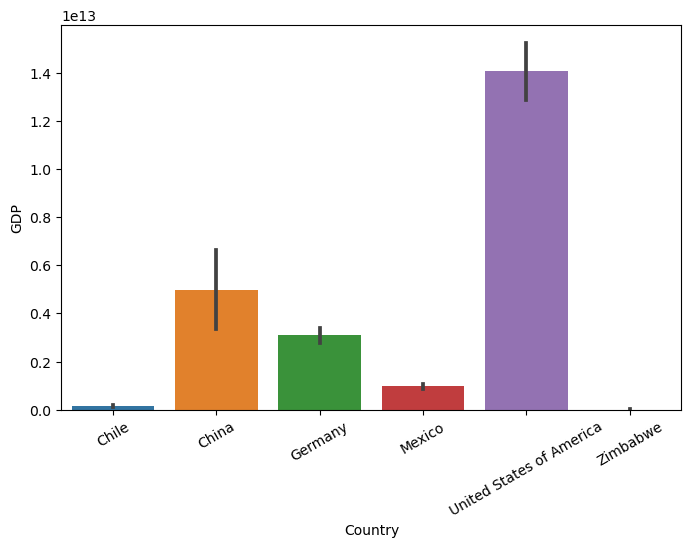

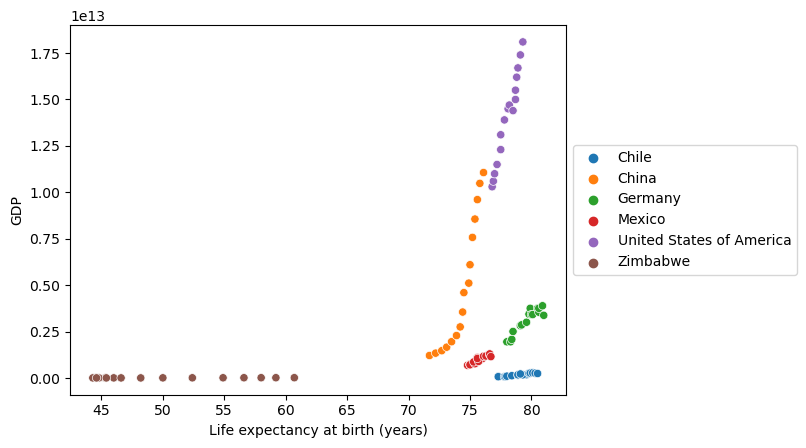

<Figure size 640x480 with 0 Axes>

In [280]:
data["GDP_1000"] = data.GDP / 1000
plt.figure(figsize = (8, 5))
sns.barplot(x = 'Country', y = 'GDP', data = data)
plt.xticks(rotation = 30, fontsize = 10)
plt.show()
plt.clf()

sns.scatterplot(x = 'Life expectancy at birth (years)', y = 'GDP', data = data, hue = 'Country')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()
plt.clf()

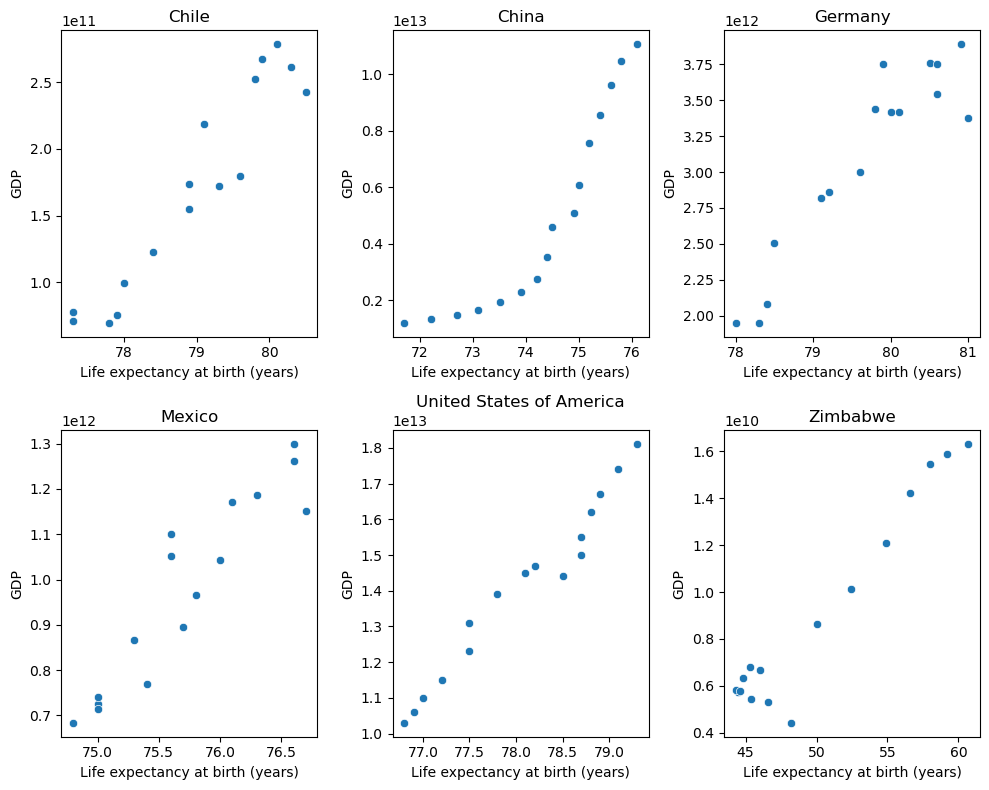

In [101]:
Countries = data.Country.unique()
plt.figure(figsize=(10, 8))
i = 1
for country in Countries:
    plt.subplot(2, 3, i)
    Country_X = data[data.Country == country]
    sns.scatterplot(x="Life expectancy at birth (years)", y="GDP", data=Country_X)
    plt.title(country)
    plt.xlabel("Life expectancy at birth (years)")
    plt.ylabel("GDP")
    i += 1

plt.tight_layout()
plt.show()


In [129]:
#df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
data_means_GDP = data.GDP.groupby(data.Country).mean()
data_means_Year = data["Life expectancy at birth (years)"].groupby(data.Country).mean()
data_means = pd.DataFrame({"Mean_GDP" :data_means_GDP, "Mean_Years" : data_means_Year})
data_means.reset_index(inplace = True)
print(data_means)


                    Country      Mean_GDP  Mean_Years
0                     Chile  1.697888e+11    78.94375
1                     China  4.957714e+12    74.26250
2                   Germany  3.094776e+12    79.65625
3                    Mexico  9.766506e+11    75.71875
4  United States of America  1.407500e+13    78.06250
5                  Zimbabwe  9.062580e+09    50.09375


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


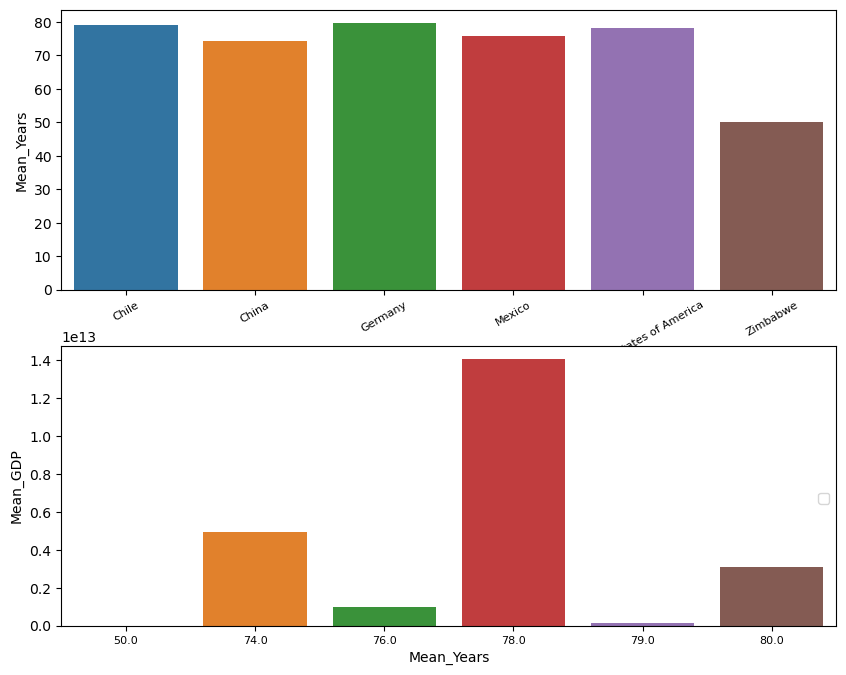

<Figure size 640x480 with 0 Axes>

In [243]:
plt.figure(figsize = (10,8))
plt.subplot(211)
sns.barplot(x = "Country", y = "Mean_Years", data = data_means, width = 0.8, dodge = True)
plt.xticks(rotation = 30, fontsize = 8)
plt.subplot(212)
sns.barplot(x = round(data_means.Mean_Years, 0), y = "Mean_GDP", data = data_means, width = 0.8, dodge = True)
plt.xticks(fontsize = 8)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()
plt.clf()

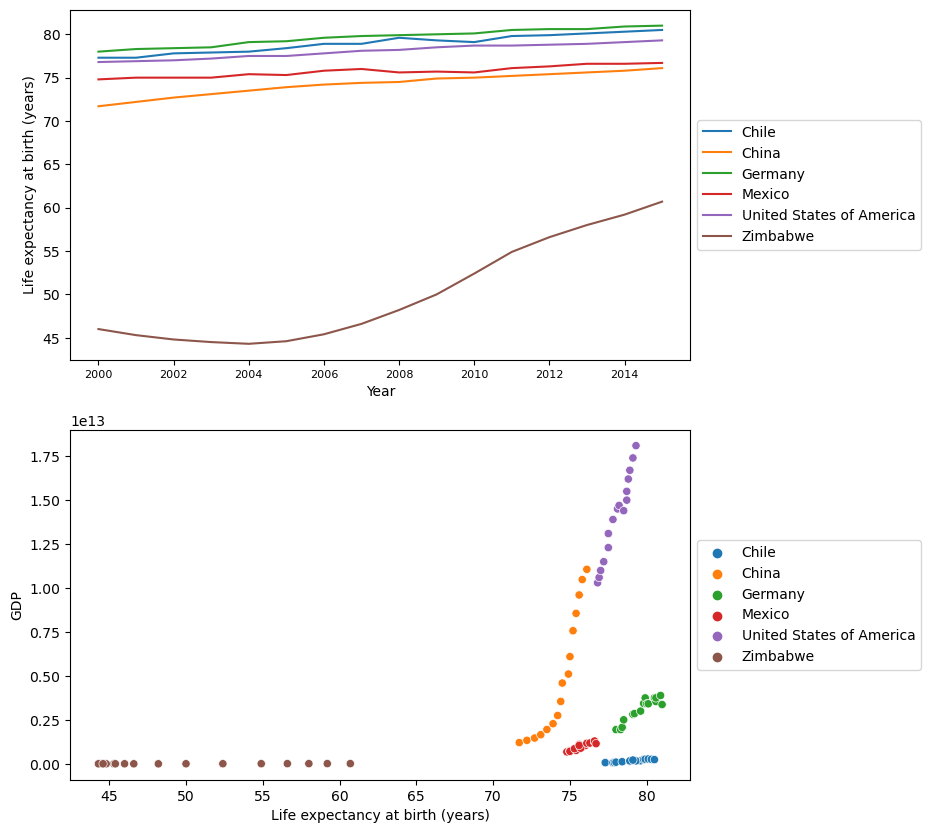

<Figure size 640x480 with 0 Axes>

In [284]:
plt.figure(figsize = (8,10))
plt.subplot(211)
sns.lineplot(x = "Year", y = "Life expectancy at birth (years)", data = data, hue = "Country")
plt.xticks(fontsize = 8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(212)
sns.scatterplot(x = "Life expectancy at birth (years)", y = "GDP", data = data, hue = "Country" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
plt.clf()

/Users/jsalgado/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


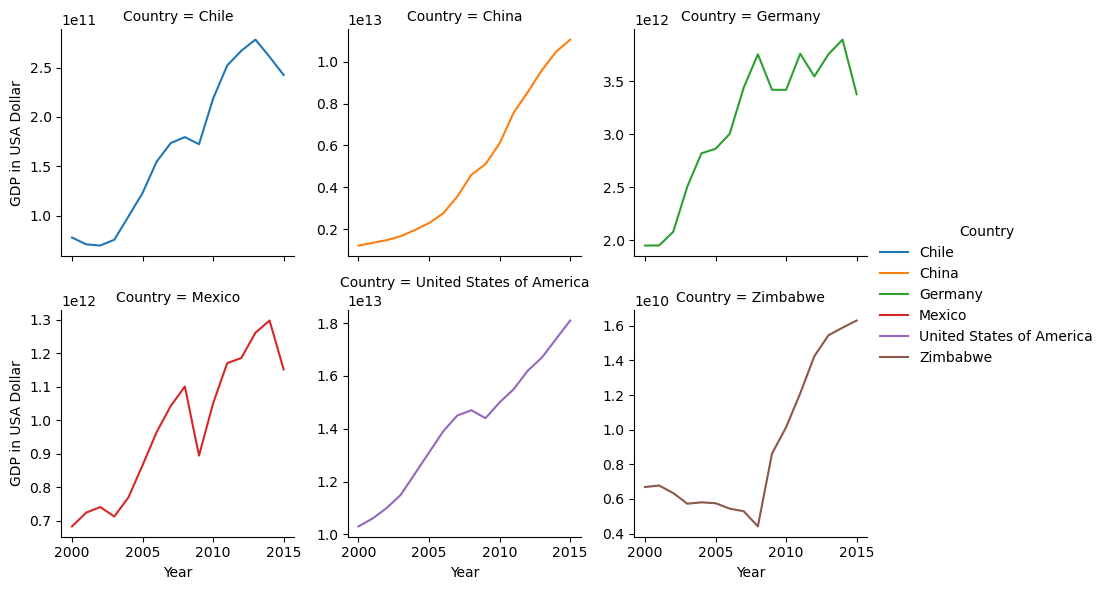

In [260]:
graph = sns.FacetGrid(data, col = "Country", col_wrap = 3, hue = "Country", sharey = False)
graph = (graph.map(sns.lineplot, "Year", "GDP").add_legend().set_axis_labels("Year", "GDP in USA Dollar"))
print(graph)
#graph = sns.FacetGrid(data, col="Country", col_wrap=3,
                      #hue = "Country", sharey = False)

#graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         #.add_legend()
         #.set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

/Users/jsalgado/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jsalgado/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 25.722222222222214, 'Life expectancy at birth (years)')

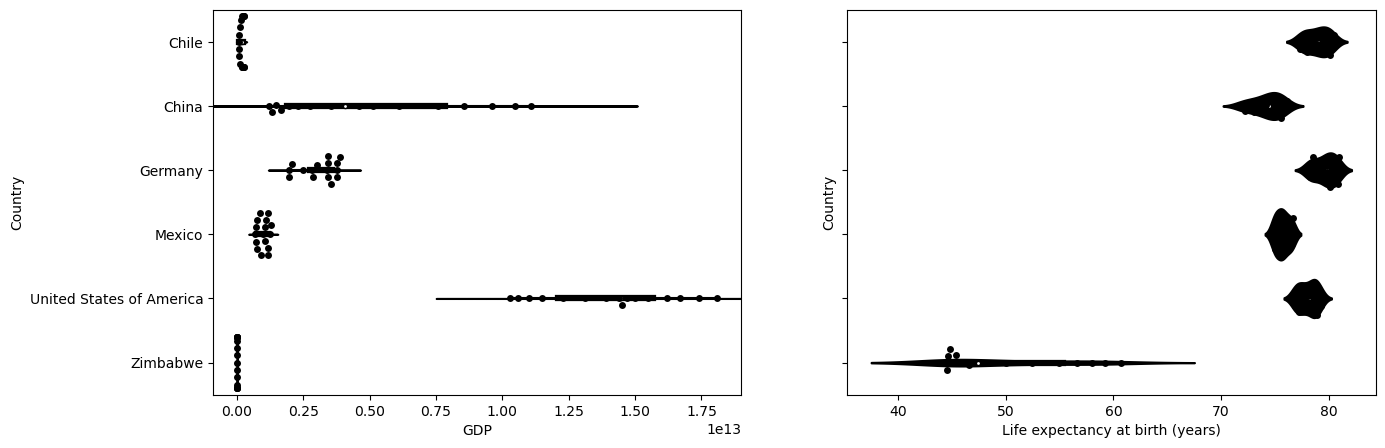

In [271]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 5))

axes[0] = sns.violinplot(ax = axes[0], x = "GDP", y = "Country", data = data, color = "black")
axes[0] = sns.swarmplot(ax = axes[0], x = "GDP", y = "Country", data = data, color = "black")
plt.xlabel("GDP in USD Dollar")
axes[1] = sns.violinplot(ax = axes[1], x = "Life expectancy at birth (years)", y = "Country", data = data, color = "black")
axes[1] = sns.swarmplot(ax = axes[1], x = "Life expectancy at birth (years)", y = "Country", data = data, color = "black")
plt.xlabel("Life expectancy at birth (years)")
